# 19.2. ~ 3. 파이썬을 활용한 빅데이터 분석 과정 - 개인프로젝트 

## 주제 : Youtube 자동자막과 원문 비교로 특징적인 자음, 모음 패턴 발견하기

## 문제 인식
- Youtube 자동자막 생성의 영어 자막 정확도가 상당히 높아 영어 공부 도구로도 활용함.
- 한국어 자막의 경우, 영상 제작 환경에 따라 다르지만, 정확도가 영어 자막에 비해 낮다.
- 한국어는 왜 정확도가 낮은지, 기계가 인식하는 것과 사람이 인식하는 정도의 차이에 궁금증에서 시작함

## 문제 정의
- Youtube 자동자막이 출력하는 한글 자막 중에서 자주 틀리는 자음,모음 조합이 무엇인지 찾는다.

## 분석 방법
### 데이터 수집 - 데이터 세트화 - 데이터 분석 및 기계 학습 - 결과물 검토 - 결론

### 데이터 수집
- 사용할 데이터 : Youtube YTN 채널 영상 별 업로드되어 있는 본문 기사내용, 자동자막 결과
- 사용할 툴 : 파이썬, 발음표기 모듈(koG2P), Youtube API, 웹 크롤링
- 유튜브 YTN 채널 영상 내 설명글(원문내용)
- 각 영상마다 자동자막 결과(인식내용)
- 인식내용을 원문내용과 비교하여 오류 단어와 실제 단어 중심으로 수집
- 오타 단어와 실제 단어를 발음표기로 전환하여 표기
### 데이터 세트화
- 속성 : 원문단어, 인식단어, 원문단어발음표기, 인식단어발음표기
- 라벨 : 원문단어와 인식단어가 일치하는 경우 0, 그렇지 않은 경우 1로 값 부여
### 데이터 분석
- 발음법으로 표기된 (로마자+숫자) 데이터로 분석한다.
- 로마자(알파벳)과 숫자를 One-Hot-encoding한다.
- K-clustering : 오류 단어 중에서 유사한 패턴을 가진 자,모음의 집합을 살펴본다.
- CountVectorizer : 오류 단어 중에서 가장 많이 등장하는 자,모음은 무엇인지 본다.
- CNN : 단어(문자열)를 이미지로 변환하여 이미지 픽셀값으로 비교하기

    __더 살펴봐야할 문제 : 패턴을 발견하려면 먼저나온 자음과 받침과 나중에 나온 자음 등 순서를 봐야한다. 원핫인코딩 방법은 순서를 고려하지 않은 단순히 등장 갯수를 기준으로 기입하기 때문에 적합한 모델을 찾아봐야 한다.__
    __RNN이나 신경망을 활용하면 이전에 등장한 값을 소실하지 않고 값을 찾을 수 있을 것이라 추측한다.__
### 데이터 수집 , 세트화 예시

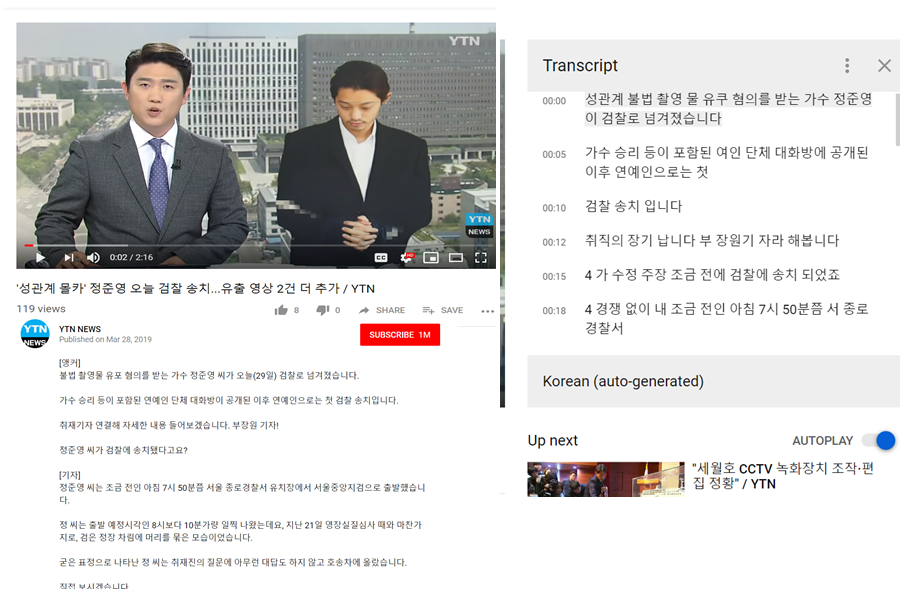

실제단어,인식단어,실제단어발음표기,인식단어발음표기 <br>
대흥사,대능사,t0 qq h0 xx ng s0 aa,t0 qq nn xx ng s0 aa <br>
땅끝,땅크,tt aa ng kk xx tf,tt aa ng kh xx<br>
해남, 배남,h0 qq nn aa mf,p0 qq nn aa mf<br>
전국,전둑,c0 vv nf k0 uu kf,c0 vv nf t0 uu kf<br>
나눠,나러,nn aa nn wv,nn aa rr vv<br>
동민,농민,t0 oo ng mm ii nf,nn oo ng mm ii nf<br>
수당,수장,s0 uu t0 aa ng,s0 uu c0 aa ng<br>
고장,구장,k0 oo c0 aa ng,k0 uu c0 aa ng<br>

### 분석
진행중

## 데이터 전처리

In [2]:
#문장 중 일부만 가져와서 전처리 시도
origin = 'YTN은 삼일운동 100주년 기획으로 시청자 여러분의 제보를 받아 알려지지 않은 친일 잔재물을 찾고 있습니다'
subtitle = '와 이제는 삼일운동 100주년 기획으로 시청자 여러분의 재벌을 받아 알려지지 않은 친일 찬 재물을 찾고 있습니다'
#공백 기준으로 문장을 나누기
origin = origin.split(' ')
subtitle = subtitle.split(' ')
print(origin)
print(subtitle)
# 형태소 분석기를 활용해 파싱했을 때 형태소를 기준으로 나눠지기 때문에 오류값과 실제값을 비교하기 어려워졌음.
# 불용어 처리도 동시에 이뤄지는 문제도 있었음.
# 형태소를 활용한 문장 분석이 아니기 때문에 공백 기준으로 나눴음

['YTN은', '삼일운동', '100주년', '기획으로', '시청자', '여러분의', '제보를', '받아', '알려지지', '않은', '친일', '잔재물을', '찾고', '있습니다']
['와', '이제는', '삼일운동', '100주년', '기획으로', '시청자', '여러분의', '재벌을', '받아', '알려지지', '않은', '친일', '찬', '재물을', '찾고', '있습니다']


In [7]:
display(type(origin), type(subtitle))

list

list

In [10]:
#자막 생성할 때 발생한 공백으로 문장 길이가 달라짐. ex. YTN은 , 와 이제는
#두 문장의 구간들이 서로 같은 인덱스를 가져야 비교할 데이터를 가져올 수 있음. ex. 실제 사용할 데이터 (제보를, 재벌을)

for i in range(14):
    if origin[i+1] == subtitle[i+2]:
        origin.insert(i+1,[])
    elif origin[i] == subtitle[i+2]:
        origin.insert(i+1,[])

In [32]:
print(origin)
print(subtitle)
print('origin 문장길이:',len(origin))
print('subtitle 문장길이:',len(subtitle))
print('사용할 데이터:',origin[7],',',subtitle[7])

['YTN은', [], '삼일운동', '100주년', '기획으로', '시청자', '여러분의', '제보를', '받아', '알려지지', '않은', '친일', '잔재물을', [], '찾고', '있습니다']
['와', '이제는', '삼일운동', '100주년', '기획으로', '시청자', '여러분의', '재벌을', '받아', '알려지지', '않은', '친일', '찬', '재물을', '찾고', '있습니다']
origin 문장길이: 16
subtitle 문장길이: 16
사용할 데이터: 제보를 , 재벌을


In [35]:
origin_word=[]
subtitle_word=[]
for i in range(16):
    if origin[i] == subtitle[i]:
        pass
    elif origin[i] != subtitle[i]:
        origin_word.append(origin[i])
        subtitle_word.append(subtitle[i])
print(origin_word)
print(subtitle_word)

['YTN은', [], '제보를', '잔재물을', []]
['와', '이제는', '재벌을', '찬', '재물을']


In [31]:
# kog2p 패키지를 명령창에서 불러서 사용할 데이터를 각각 발음표기법으로 변환한다
# https://github.com/scarletcho/KoG2P
# 참고 > 한국어의 문자열로부터 발음열을 생성하는 파이썬 기반 G2P 패키지입니다. 터미널에서 원하는 문자열을 함께 입력해 사용할 수 있습니다.
import sys

In [30]:
!ipython g2p.py '제보를'

c0 ee p0 oo rr xx ll


In [28]:
!ipython g2p.py '재벌을'

c0 qq p0 vv rr xx ll


## 부족한 부분 보완하여 진행 예정